In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import L2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt




1/1 [==============================] - 0s 10ms/step


/var/folders/q_/s86qy4dx6sj5j58slv3z77840000gn/T/ipykernel_16426/1256275531.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


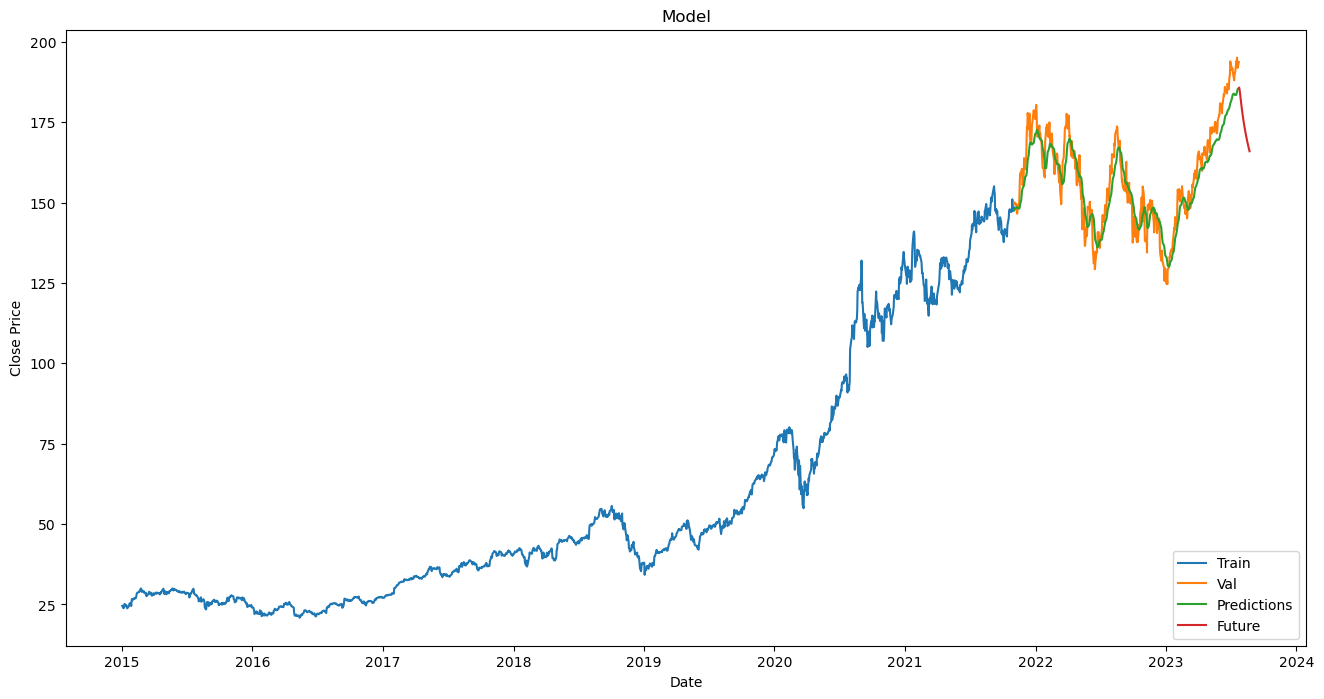

In [17]:
# Load the data
data = pd.read_csv('/Users/cedrix/Downloads/AAPL_daily_data(4).csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['adj_close'].values.reshape(-1,1))

# Define the look back period and split the data into train and test
look_back = 50
data_len = len(scaled_data)
train_len = int(data_len * 0.8)
train_data = scaled_data[0:train_len]
test_data = scaled_data[train_len - look_back:]

# Create the training and testing datasets
def create_dataset(data, look_back):
    X, Y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape the features for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# Get the predicted values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Make predictions for the next 30 days
input_data = scaled_data[-look_back:]  # start with the last 50 days of data
future_predictions = []
for _ in range(30):
    pred = model.predict(input_data.reshape(1, -1, 1))  # make a prediction
    future_predictions.append(pred)  # store the prediction
    input_data = np.roll(input_data, -1)  # shift the data
    input_data[-1] = pred  # insert the prediction at the end

# Unscale the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

# Plot the results
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions
future_dates = pd.date_range(start=valid.index[-1], periods=31)[1:]  # create future dates
future = pd.DataFrame(future_predictions, index=future_dates, columns=['Future Predictions'])
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['adj_close'])
plt.plot(valid[['adj_close', 'Predictions']])
plt.plot(future['Future Predictions'])
plt.legend(['Train', 'Val', 'Predictions', 'Future'], loc='lower right')
plt.show()


1/1 [==============================] - 0s 10ms/step


/var/folders/q_/s86qy4dx6sj5j58slv3z77840000gn/T/ipykernel_16426/1256275531.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


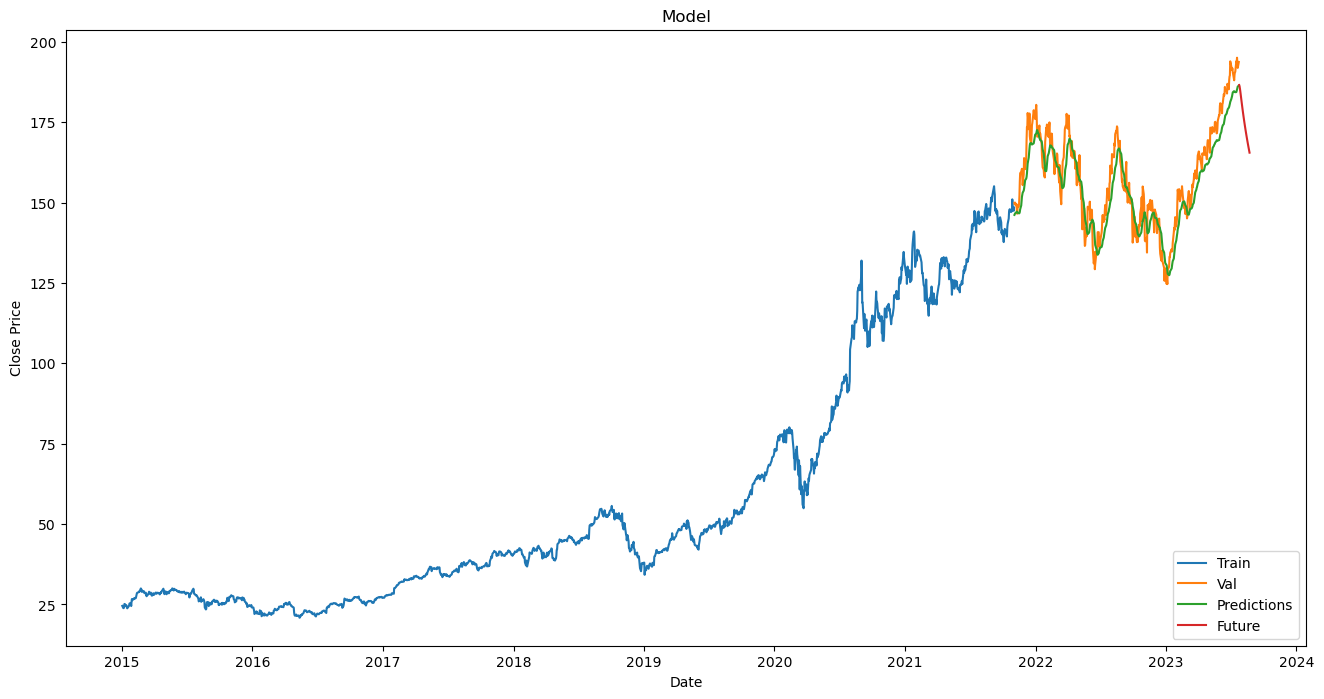

In [12]:
# Load the data
data = pd.read_csv('/Users/cedrix/Downloads/AAPL_daily_data(4).csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['adj_close'].values.reshape(-1,1))

# Define the look back period and split the data into train and test
look_back = 50
data_len = len(scaled_data)
train_len = int(data_len * 0.8)
train_data = scaled_data[0:train_len]
test_data = scaled_data[train_len - look_back:]

# Create the training and testing datasets
def create_dataset(data, look_back):
    X, Y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape the features for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# Get the predicted values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Make predictions for the next 30 days
input_data = scaled_data[-look_back:]  # start with the last 50 days of data
future_predictions = []
for _ in range(30):
    pred = model.predict(input_data.reshape(1, -1, 1))  # make a prediction
    future_predictions.append(pred)  # store the prediction
    input_data = np.roll(input_data, -1)  # shift the data
    input_data[-1] = pred  # insert the prediction at the end

# Unscale the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

# Plot the results
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions
future_dates = pd.date_range(start=valid.index[-1], periods=31)[1:]  # create future dates
future = pd.DataFrame(future_predictions, index=future_dates, columns=['Future Predictions'])
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['adj_close'])
plt.plot(valid[['adj_close', 'Predictions']])
plt.plot(future['Future Predictions'])
plt.legend(['Train', 'Val', 'Predictions', 'Future'], loc='lower right')
plt.show()


Epoch 1/20
1672/1672 [==============================] - 13s 7ms/step - loss: 0.0288
Epoch 2/20
1672/1672 [==============================] - 12s 7ms/step - loss: 5.8124e-04
Epoch 3/20
1672/1672 [==============================] - 12s 7ms/step - loss: 6.5529e-04
Epoch 4/20
1672/1672 [==============================] - 12s 7ms/step - loss: 5.2031e-04
Epoch 5/20
1672/1672 [==============================] - 12s 7ms/step - loss: 4.8082e-04
Epoch 6/20
1672/1672 [==============================] - 12s 7ms/step - loss: 4.2496e-04
Epoch 7/20
1672/1672 [==============================] - 12s 7ms/step - loss: 4.5226e-04
Epoch 8/20
1672/1672 [==============================] - 12s 7ms/step - loss: 4.2771e-04
Epoch 9/20
1672/1672 [==============================] - 12s 7ms/step - loss: 4.1942e-04
Epoch 10/20
1672/1672 [==============================] - 13s 8ms/step - loss: 3.3900e-04
Epoch 11/20
1672/1672 [==============================] - 12s 7ms/step - loss: 3.5895e-04
Epoch 12/20
1672/1672 [===========

/var/folders/q_/s86qy4dx6sj5j58slv3z77840000gn/T/ipykernel_16426/4222072380.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


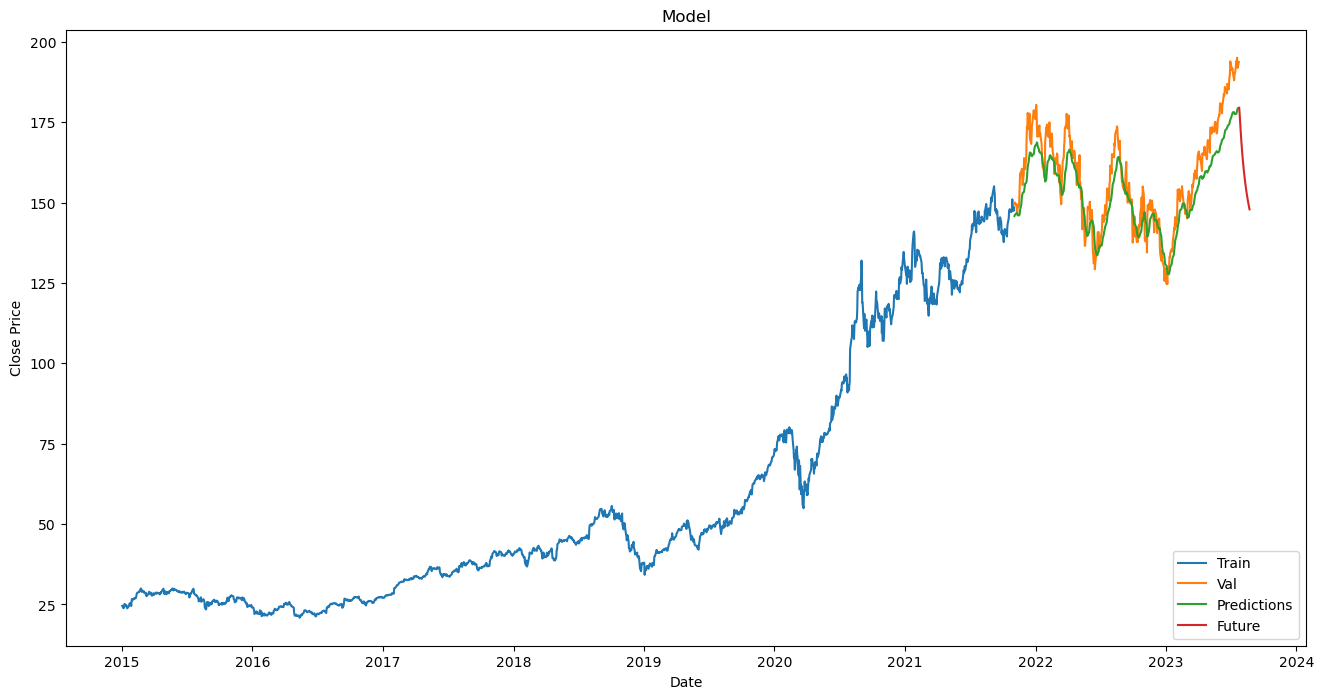

MSE: 54.04699888902667
RMSE: 7.351666402185743
MAPE: 3.7429352867614134%


In [14]:


# Load the data
data = pd.read_csv('/Users/cedrix/Downloads/AAPL_daily_data(4).csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['adj_close'].values.reshape(-1,1))

# Define the look back period and split the data into train and test
look_back = 50
data_len = len(scaled_data)
train_len = int(data_len * 0.8)
train_data = scaled_data[0:train_len]
test_data = scaled_data[train_len - look_back:]

# Create the training and testing datasets
def create_dataset(data, look_back):
    X, Y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape the features for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model with L2 regularization
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), recurrent_regularizer=L2(0.01)))
model.add(LSTM(units=50, return_sequences=False, recurrent_regularizer=L2(0.01)))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile and train the model for 20 epochs
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=1, epochs=20)

# Get the predicted values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Make predictions for the next 30 days
input_data = scaled_data[-look_back:]  # start with the last 50 days of data
future_predictions = []
for _ in range(30):
    pred = model.predict(input_data.reshape(1, -1, 1))  # make a prediction
    future_predictions.append(pred)  # store the prediction
    input_data = np.roll(input_data, -1)  # shift the data
    input_data[-1] = pred  # insert the prediction at the end

# Unscale the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

# Plot the results
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions
future_dates = pd.date_range(start=valid.index[-1], periods=31)[1:]  # create future dates
future = pd.DataFrame(future_predictions, index=future_dates, columns=['Future Predictions'])
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['adj_close'])
plt.plot(valid[['adj_close', 'Predictions']])
plt.plot(future['Future Predictions'])
plt.legend(['Train', 'Val', 'Predictions', 'Future'], loc='lower right')
plt.show()

# Calculate the mean squared error
mse = mean_squared_error(valid['adj_close'], valid['Predictions'])
print(f'MSE: {mse}')

# Calculate the root mean squared error
rmse = sqrt(mse)
print(f'RMSE: {rmse}')

# Calculate the mean absolute percentage error
mape = np.mean(np.abs((valid['adj_close'] - valid['Predictions']) / valid['adj_close'])) * 100
print(f'MAPE: {mape}%')
